# Ex1

Santiago Benites 54392

João Ferreira 55312

# Imports

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import backend as K
import os
import tensorflow as tf


2023-04-30 14:29:41.641990: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load Dataset

Dataset Link - https://www.kaggle.com/datasets/ashishsaxena2209/animal-image-datasetdog-cat-and-panda

In [4]:
# Path to train and test directory
dir_ = os.path.join('Dataset/animals/')


# Generate training and test data with Image Generator
train_datagen = ImageDataGenerator(rescale=1/255,
                                  validation_split = 0.2)


train_generator = train_datagen.flow_from_directory(dir_,target_size=(100, 100),
                                                   batch_size= 1920,
                                                   class_mode='categorical',
                                                   shuffle=False,
                                                   subset = 'training')

test_generator = train_datagen.flow_from_directory(dir_,
                                                          target_size = (100,100),
                                                          batch_size = 480,
                                                          class_mode = 'categorical',
                                                          shuffle=False,
                                                          subset = 'validation')


# Fetch the data and the labels
x_train, y_train = next(train_generator)
x_test, y_test  = next(test_generator)

# Fix the filepath
test_filepath = []
for filepath in test_generator.filepaths:
    filepath = filepath.replace('\\', '/')
    test_filepath.append(filepath)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


# Model

In [6]:
model = Sequential([
    
    # First convolution
        Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
        MaxPooling2D(2, 2),
    
    # Second convolution
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
    
    # Third convolution
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
    
        Flatten(),
    
    # Dense hidden layer
        Dense(512, activation='relu'),
        Dropout(0.2),
    
    # Output neuron. 
        Dense(3, activation='softmax') 
])

2023-04-30 14:55:09.453122: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Fit Model

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=80, verbose=1)

Epoch 1/80


2023-04-30 14:55:23.391368: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1180139520 exceeds 10% of free system memory.
2023-04-30 14:55:24.265952: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 542883840 exceeds 10% of free system memory.
2023-04-30 14:55:25.588381: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 542883840 exceeds 10% of free system memory.
2023-04-30 14:55:27.095299: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 590069760 exceeds 10% of free system memory.
2023-04-30 14:55:27.095360: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1180139520 exceeds 10% of free system memory.


2/2 [==============================] - 13s 1s/step - loss: 1.7543 - accuracy: 0.1846
Epoch 2/80
2/2 [==============================] - 14s 3s/step - loss: 0.9913 - accuracy: 0.5337
Epoch 3/80
2/2 [==============================] - 16s 11s/step - loss: 1.2746 - accuracy: 0.3333
Epoch 4/80
2/2 [==============================] - 14s 2s/step - loss: 1.2524 - accuracy: 0.3333
Epoch 5/80
2/2 [==============================] - 16s 2s/step - loss: 1.1889 - accuracy: 0.3333
Epoch 6/80
2/2 [==============================] - 17s 13s/step - loss: 1.2142 - accuracy: 0.3333
Epoch 7/80
2/2 [==============================] - 15s 2s/step - loss: 1.1998 - accuracy: 0.3333
Epoch 8/80
2/2 [==============================] - 18s 12s/step - loss: 1.1900 - accuracy: 0.3333
Epoch 9/80
2/2 [==============================] - 16s 12s/step - loss: 1.2039 - accuracy: 0.3333
Epoch 10/80
2/2 [==============================] - 14s 2s/step - loss: 1.1717 - accuracy: 0.3333
Epoch 11/80
2/2 [=============================

# Predict Our Image

In [10]:
from tensorflow.keras.applications import inception_v3 as inc_net
import skimage
from skimage import io
from tensorflow.keras.preprocessing import image

url = 'https://raw.githubusercontent.com/marcellusruben/All_things_medium/main/Lime/panda_00024.jpg'

def read_and_transform_img(url):

    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (100,100))
    
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    return img

images = read_and_transform_img(url)

preds = model.predict(images)
prediction = np.argmax(preds)
pct = np.max(preds)

if prediction == 0:
    print('It\'s a cat!')
elif prediction == 1:
    print('It\'s a dog!')
else:
    print('It\'s a panda!')

print(pct)

1/1 [==============================] - 0s 76ms/step
It's a panda!
0.82356834


# LIME

In [11]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(images[0].astype('double'), model.predict, top_labels=3, hide_color=0, num_samples=1000)

/home/santig/Programs/mambaforge/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 20/1000 [00:00<00:05, 176.03it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 40/1000 [00:00<00:05, 179.33it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 60/1000 [00:00<00:05, 182.93it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 80/1000 [00:00<00:05, 183.33it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 100/1000 [00:00<00:04, 181.44it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 120/1000 [00:00<00:05, 175.48it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▍        | 140/1000 [00:00<00:05, 165.83it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 160/1000 [00:00<00:05, 158.66it/s]

1/1 [==============================] - 0s 28ms/step


 18%|█▊        | 180/1000 [00:01<00:05, 154.75it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 200/1000 [00:01<00:05, 153.56it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 220/1000 [00:01<00:04, 157.02it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 240/1000 [00:01<00:04, 163.16it/s]

1/1 [==============================] - 0s 23ms/step


 26%|██▌       | 260/1000 [00:01<00:04, 169.37it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 280/1000 [00:01<00:04, 169.86it/s]

1/1 [==============================] - 0s 22ms/step


 30%|███       | 300/1000 [00:01<00:04, 167.64it/s]

1/1 [==============================] - 0s 22ms/step


 32%|███▏      | 320/1000 [00:01<00:03, 172.17it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 340/1000 [00:02<00:03, 173.82it/s]

1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 360/1000 [00:02<00:03, 177.76it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 380/1000 [00:02<00:03, 174.18it/s]

1/1 [==============================] - 0s 22ms/step


 40%|████      | 400/1000 [00:02<00:03, 168.32it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▏     | 420/1000 [00:02<00:03, 173.63it/s]

1/1 [==============================] - 0s 22ms/step


 44%|████▍     | 440/1000 [00:02<00:03, 177.13it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 460/1000 [00:02<00:03, 170.07it/s]

1/1 [==============================] - 0s 27ms/step


 48%|████▊     | 480/1000 [00:02<00:03, 162.63it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 500/1000 [00:02<00:03, 160.66it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 520/1000 [00:03<00:02, 160.31it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 540/1000 [00:03<00:02, 163.65it/s]

1/1 [==============================] - 0s 23ms/step


 56%|█████▌    | 560/1000 [00:03<00:02, 168.26it/s]

1/1 [==============================] - 0s 36ms/step


 58%|█████▊    | 580/1000 [00:03<00:02, 164.06it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 600/1000 [00:03<00:02, 163.82it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 620/1000 [00:03<00:02, 169.81it/s]

1/1 [==============================] - 0s 25ms/step


 64%|██████▍   | 640/1000 [00:03<00:02, 168.49it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 660/1000 [00:03<00:02, 164.95it/s]

1/1 [==============================] - 0s 25ms/step


 68%|██████▊   | 680/1000 [00:04<00:02, 156.91it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 700/1000 [00:04<00:01, 154.41it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 720/1000 [00:04<00:01, 152.10it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 740/1000 [00:04<00:01, 156.17it/s]

1/1 [==============================] - 0s 22ms/step


 76%|███████▌  | 760/1000 [00:04<00:01, 164.30it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 780/1000 [00:04<00:01, 168.23it/s]

1/1 [==============================] - 0s 22ms/step


 80%|████████  | 800/1000 [00:04<00:01, 174.77it/s]

1/1 [==============================] - 0s 22ms/step


 82%|████████▏ | 820/1000 [00:04<00:01, 174.16it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 840/1000 [00:05<00:00, 176.39it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 860/1000 [00:05<00:00, 179.56it/s]

1/1 [==============================] - 0s 22ms/step


 88%|████████▊ | 880/1000 [00:05<00:00, 182.60it/s]

1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 900/1000 [00:05<00:00, 176.49it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 920/1000 [00:05<00:00, 171.47it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████▍| 940/1000 [00:05<00:00, 158.96it/s]

1/1 [==============================] - 0s 23ms/step


 96%|█████████▌| 960/1000 [00:05<00:00, 161.68it/s]

1/1 [==============================] - 0s 23ms/step


 98%|█████████▊| 980/1000 [00:05<00:00, 165.38it/s]

1/1 [==============================] - 0s 23ms/step


100%|██████████| 1000/1000 [00:05<00:00, 166.86it/s]


# LIME Explanation

(-0.5, 99.5, 99.5, -0.5)

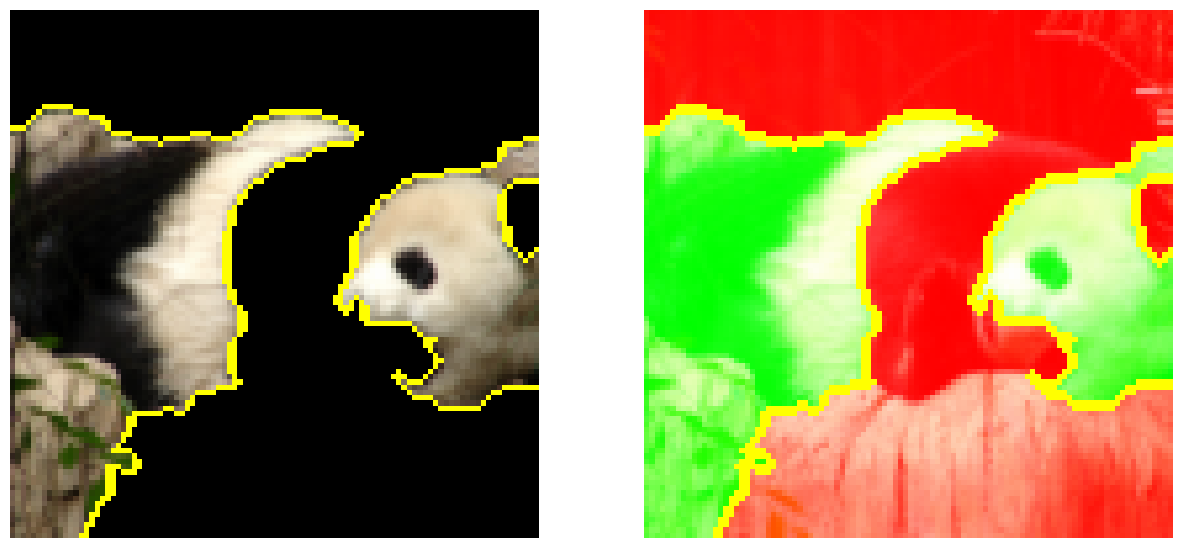

In [12]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

# i) Use SHAP to obtain similar explanations to the ones you just obtained with LIME.

# SHAP

## Segment Image

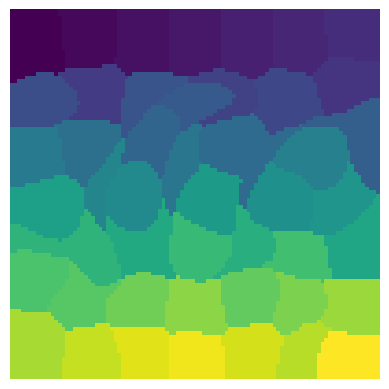

In [27]:
import shap
from skimage.segmentation import slic

# Segment image
segments_slic = slic(images[0], n_segments=50, compactness=30, sigma=3)
plt.imshow(segments_slic);
plt.axis('off');

img_orig = image.img_to_array(images[0])

## Mask Function

In [28]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

def mask_image(zs, segmentation, image, background=None):
    if background is None:
        background = image.mean((0,1))
    out = np.zeros((zs.shape[0], image.shape[0], image.shape[1], image.shape[2]))
    for i in range(zs.shape[0]):
        out[i,:,:,:] = image
        for j in range(zs.shape[1]):
            if zs[i,j] == 0:
                out[i][segmentation == j,:] = background
    return out

def f(z):
    return model.predict(preprocess_input(mask_image(z, segments_slic, img_orig, 255)))

## Explainer

In [29]:
import warnings
# use Kernel SHAP to explain the network's predictions
explainer = shap.KernelExplainer(f, np.zeros((1,50)))

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    shap_values = explainer.shap_values(np.ones((1,50)), nsamples=1000)

1/1 [==============================] - 0s 19ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

32/32 [==============================] - 1s 21ms/step


100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


## Get prediction

In [36]:
import pandas as pd
feature_names = list(train_generator.class_indices.keys())
# get the top predictions from the model
preds = model.predict(preprocess_input(np.expand_dims(img_orig.copy(), axis=0)))
top_preds = np.argsort(-preds)
inds = top_preds[0]

1/1 [==============================] - 0s 21ms/step


# SHAP Explanation

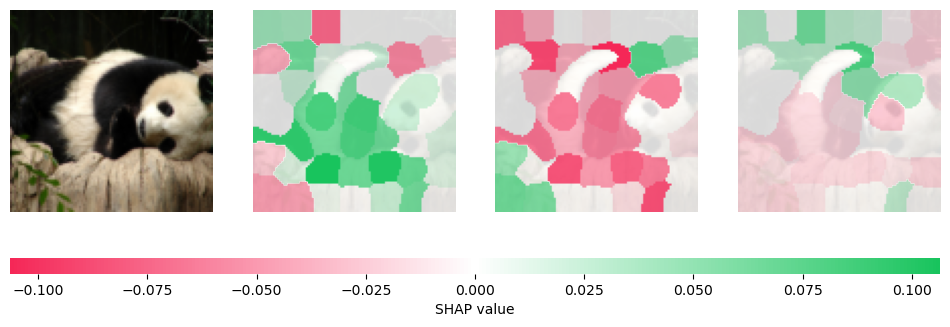

In [39]:
# make a color map
from matplotlib.colors import LinearSegmentedColormap
colors = []
for l in np.linspace(1,0,100):
    colors.append((245/255,39/255,87/255,l))
for l in np.linspace(0,1,100):
    colors.append((24/255,196/255,93/255,l))
    
cm = LinearSegmentedColormap.from_list("shap", colors)# Visualize the explanations
def fill_segmentation(values, segmentation):
    out = np.zeros(segmentation.shape)
    for i in range(len(values)):
        out[segmentation == i] = values[i]
    return out
# plot our explanations
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,4))
inds = top_preds[0]
axes[0].imshow(images[0])
axes[0].axis('off')
max_val = np.max([np.max(np.abs(shap_values[i][:,:-1])) for i in range(len(shap_values))])
for i in range(3):
    m = fill_segmentation(shap_values[inds[i]][0], segments_slic)
    #axes[i+1].set_title(feature_names[str(inds[i])][1])
    axes[i+1].imshow(images[0], alpha=0.15)
    im = axes[i+1].imshow(m, cmap=cm, vmin=-max_val, vmax=max_val)
    axes[i+1].axis('off')
cb = fig.colorbar(im, ax=axes.ravel().tolist(), label="SHAP value", orientation="horizontal", aspect=60)
cb.outline.set_visible(False)
plt.show()

# ii) Which approach generated better explanations?

As we can see from the conclusions gather from LIME and SHAP, LIME was better at predicting the location of the panda, this because as we can see above Lime was able to predict the which pixels the panda was one with better accuracy than SHAP.
And considering that SHAP misclassified some pixels of the image as being part of the panda, and misclassified some parts of the background as being part of the panda.